# Walk Cycle Detection for UnifyID coding challenge
Daniel Wen (github.com/danielwen)

## Data collection

The data was collected using the Accelerometer app on iOS. I placed my phone in my pocket while I walked. The sample rate was 20Hz.

I walked for 50 seconds, but let's plot a shorter segment of the data.

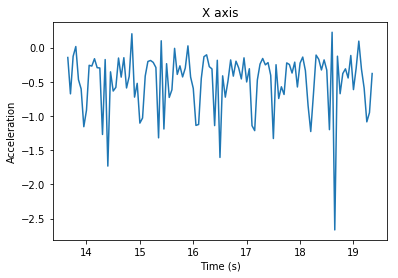

In [1]:
from matplotlib import pyplot as plt
import csv

SAMPLE_RATE = 20 # Hz

# Load data
t, X, Y, Z = [], [], [], []
with open("walk.csv") as f:
    r = csv.DictReader(f, delimiter=';')
    for row in r:
        t.append(float(row["index"])/SAMPLE_RATE)
        X.append(float(row["x"]))
        Y.append(float(row["y"]))
        Z.append(float(row["z"]))

plt.plot(t, X)
plt.title("X axis")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration")
plt.show()
    

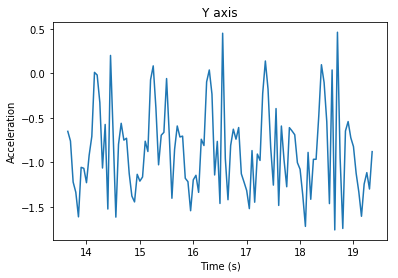

In [2]:
plt.plot(t, Y)
plt.title("Y axis")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration")
plt.show()

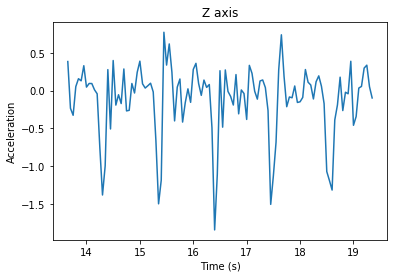

In [3]:
plt.plot(t, Z)
plt.title("Z axis")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration")
plt.show()

## Walk cycle detection

To perform walk cycle detection, I refered to the paper "[Gait Identification Using Accelerometer on Mobile Phone
](http://web.engr.oregonstate.edu/~hoangmin/pub/c/2012_ICCAIS.pdf)".

In the paper, they only use the Z-axis because it shows the walk cycles most clearly.

I first remove from noise from the data using a Gaussian filter.

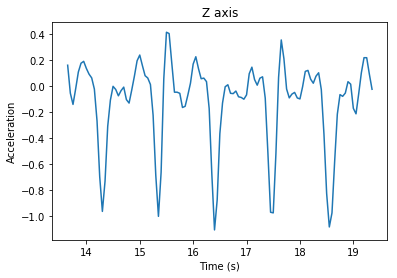

In [14]:
from scipy.ndimage.filters import gaussian_filter1d

Z_smooth = gaussian_filter1d(Z, 1)
def plot_smooth():
    plt.plot(t, Z_smooth)
    plt.title("Z axis")
    plt.xlabel("Time (s)")
    plt.ylabel("Acceleration")

plot_smooth()
plt.show()

We can see the walk cycles more clearly now. Each cycle is delimited by a downward spike, which represents a heel strike.

The downward spikes are called "true peaks". To find the true peaks, I first get all the "peaks", which are points that are lower than their left and right neighbor. Then, I keep only those that are below a threshold determined by the mean and standard deviation.

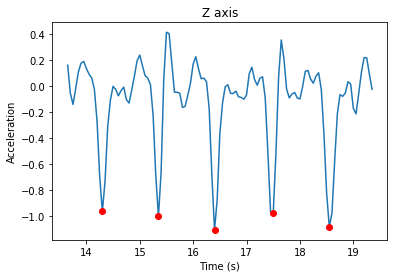

In [15]:
import numpy as np
t_peaks, Z_peaks = [], []

# Loop through each triple of points
for i in range(1, len(t) - 2):
    if Z_smooth[i - 1] >= Z_smooth[i] and Z_smooth[i] <= Z_smooth[i + 1]:
        t_peaks.append(t[i])
        Z_peaks.append(Z_smooth[i])

mean = np.mean(Z)
std = np.std(Z)

# Threshold for true peaks
k = 1
threshold = mean - k*std

# Filter true peaks and plot them
t_true, Z_true = [], []
for t_i, z in zip(t_peaks, Z_peaks):
    if z < threshold:
        t_true.append(t_i)
        Z_true.append(z)

plot_smooth()
plt.plot(t_true, Z_true, 'ro')
plt.show()

## Discussion

We can automatically identify the walk cycles because each cycle starts with a heel strike, which produces a large change in the z-axis. 

At approximately the midpoint between two heel strikes, we can also see another shorter peak. This should represent the heel strike on the opposite side. 